# Computer Assignment 3

Due Date 12 ตุลาคม  2566 (ก่อนเวลา 23.00 น.)

นักศึกษาต้องสร้าง Classifier โดยเลือกจากที่เรียนในห้องเรียน หรือค้นคว้าจากวารสารทางวิชาการต่างๆ และนำมาทดลองกับ Ionosphere data set ซึ่ง data set ชุดนี้มีทั้งหมด 351 samples โดยแบ่งออกเป็น 2 class คือ good (g) class และ bad (b) class โดยที่ ใน g class มี 224 sample และใน b class มี 127 sample ใน data set ชุดนี้มี features ทั้งหมด 34 features ซึ่ง format ของ data set เป็น ดังนี้

    f1, f2,…,f34 Class

และนักศึกษาต้องทำการ select subset ของ feature ที่ดีที่สุด โดยเลือกใช้วิธีการที่เรียนในห้องเรียน หรือค้นคว้าจากวารสารทางวิชาการก็ได้

          อย่าลืมทำการประเมินประสิทธิภาพของวิธีการนี้ เช่นใช้ 10% cross validation

 

รายงานควรจะประกอบด้วย

          1. รายละเอียดของทฤษฎีหรือวิธีการต่างๆที่ใช้

          2. การออกแบบ algorithm เช่น pseudo-code, flowchart, ฯลฯ

          3. ผลการทดลอง

          4. การวิเคราะห์การทดลอง เช่น ได้ผลตามที่คาดไว้หรือไม่ มีสิ่งประหลาดเกิดขึ้นหรือไม่ บทสรุปที่ได้คืออะไร ฯลฯ

          5. Well documented, structured, modular program listing

          6. อย่าลืมแนบโปรแกรมมาในภาคผนวกด้วย

In [3]:
import pandas as pd

# open the txt file and read its contents
with open('ionosphere.txt', 'r', encoding='ISO-8859-1') as file:
    data = file.read()

# remove first 2 letters
data = data[2:]

# remove '\x00' from the data
data = data.replace('\x00', '')

# create a dataframe from the data
df = pd.DataFrame([row.split() for row in data.split('\n')])

# drop the row with odd index
df = df.drop(df.index[1::2])
# drop the last row
df = df.drop(df.index[-1])

# firt row is the column names
df.columns = df.iloc[0]
# drop the first row
df = df.drop(df.index[0])

column_name = [f"f{i}" for i in range(1, 35)] + ['class']

# rename the columns
df.columns = column_name

# convert the class column to binary
df['class'] = df['class'].replace(['b', 'g'], [0, 1]) # b = 0, g = 1

# convert the data type to float
df = df.astype(float)

# reset the index
df = df.reset_index(drop=True)

df.head()



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1.0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0.0
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1.0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0.0
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1.0


# Feature selection

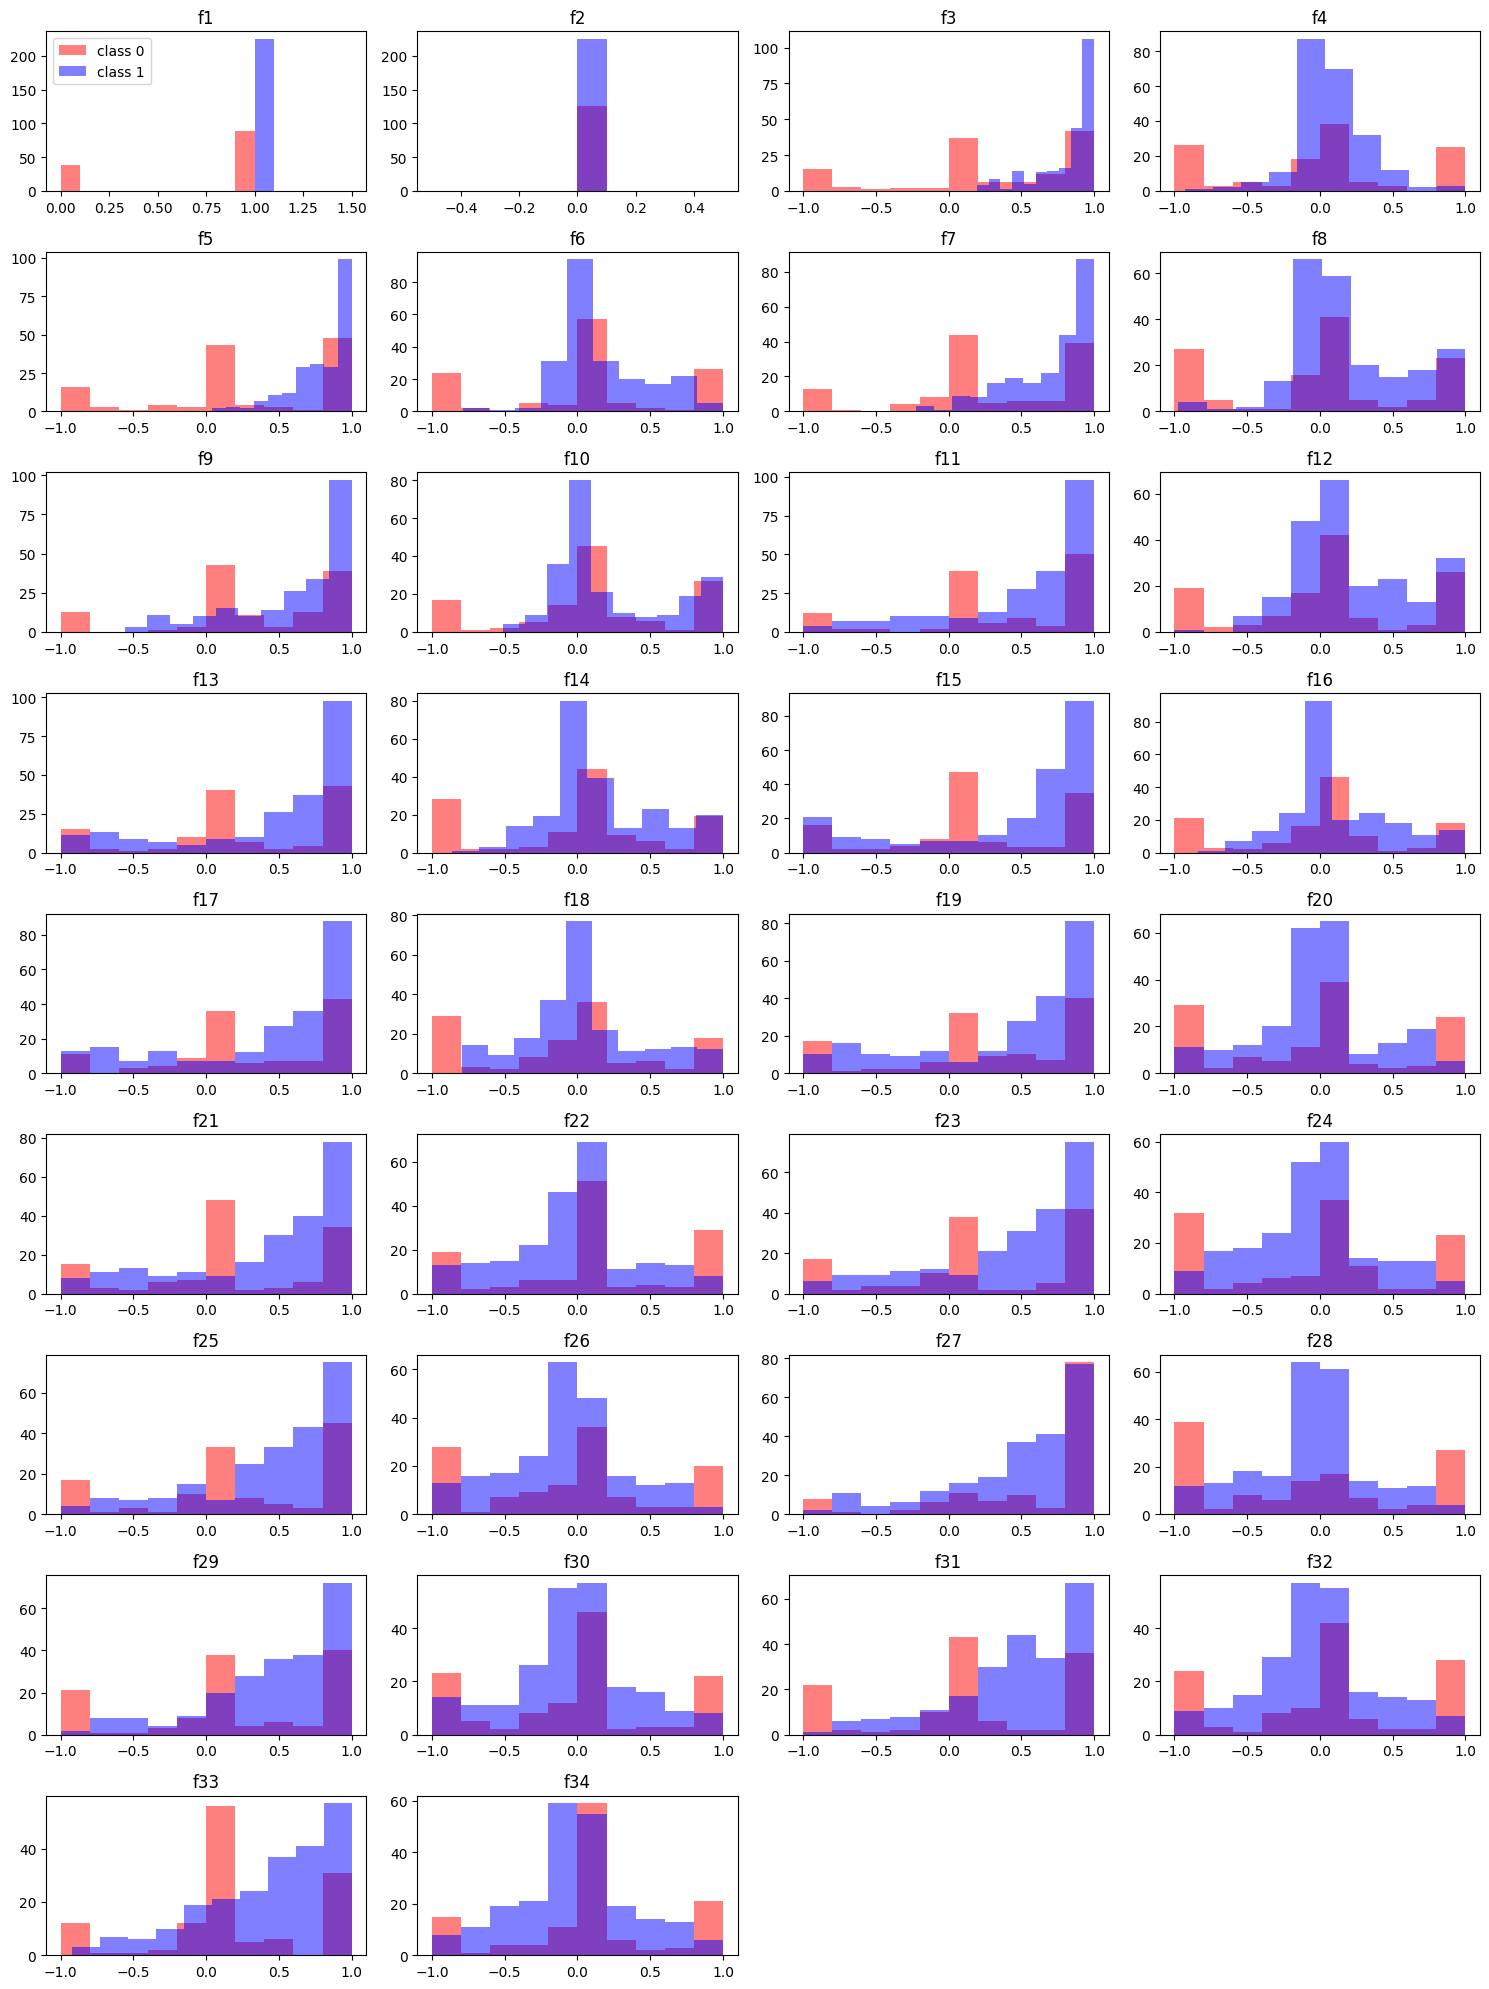

In [5]:
import matplotlib.pyplot as plt

# make sure the column 'class' is present in the dataframe
if 'class' not in df.columns:
    df.columns = df.columns[:-1].tolist() + ['class']

# group the dataframe by class
grouped = df.groupby("class")

# number of rows = ceil(number of features / 4)
rows = (len(df.columns) - 1) // 4 + 1

# create subplots
fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(15, 20))

# plot histograms for each feature
for i, feature in enumerate(df.columns[:-1]):
    row = i // 4
    col = i % 4
    for name, group in grouped:
        axs[row, col].hist(group[feature], alpha=0.5, \
                           label=f"class {int(name)}", color='blue' if int(name) == 1 else 'red')
        if row == 0 and col == 0:
            axs[row, col].legend()
    axs[row, col].set_title(feature)

# remove the last 2 subplots
fig.delaxes(axs[8, 3])
fig.delaxes(axs[8, 2])

plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


# Linear classifier